https://github.com/atcemgil/notes/blob/master/swe582/SWE582%20TakeHome%202016.ipynb

http://mbmlbook.com/TrueSkill.html and 
http://mbmlbook.com/TrueSkill_Modelling_the_outcome_of_games.html

In [170]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline

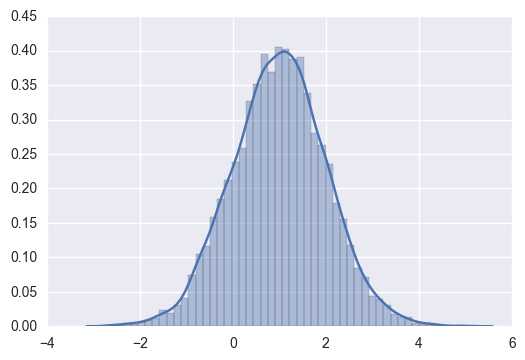

In [171]:
N = 10000
mean = 0
std_dev = 1
samples1 = np.random.normal(mean, std_dev, N)
sns.distplot(samples,norm_hist=True)

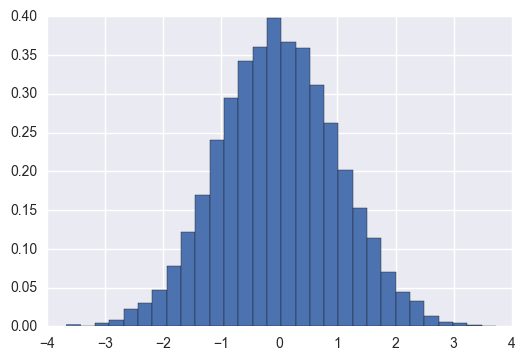

In [172]:
n, bins, patches = plt.hist(samples1, bins=30, normed=True)

### percentage

In [173]:
percentage_1 = len(np.where((samples1 >= -1) & (samples1 <=1))[0]) / N
percentage_2 = len(np.where((samples1 >= -2) & (samples1 <=2))[0]) / N
percentage_3 = len(np.where((samples1 >= -3) & (samples1 <=3))[0]) / N
print("between -1 and 1: %{}".format(percentage_1))
print("between -2 and 2: %{}".format(percentage_2))
print("between -3 and 3: %{}".format(percentage_3))

between -1 and 1: %0.6733
between -2 and 2: %0.9504
between -3 and 3: %0.9968


In [174]:
print("mean: {}, \nvariance: {}, \nstandard deviation: {}".format(
    np.mean(samples1),
    np.var(samples1),
    np.std(samples1)))

mean: -0.01106177714721072, 
variance: 1.0390332214029767, 
standard deviation: 1.0193297903048733


### creating the second sample set

In [175]:
N = 10000
mean = 1
std_dev = 1
samples2 = np.random.normal(mean, std_dev, N)

## pairing the two sample sets
> the X co-ordinate of each point is a sample from the first set and the Y co-ordinate is the corresponding sample from the second set 

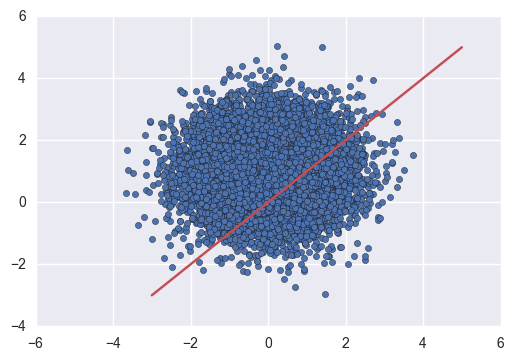

In [176]:
plt.scatter(samples1, samples2)
plt.plot(np.linspace(-3,5, 10000), np.linspace(-3,5, 10000), c="r")

### the fraction of samples which lie above the diagonal line where X=Y

In [177]:
len(np.where((samples2 > samples1))[0]) / N

0.7607

### the posterior distribution numerically over Ywins

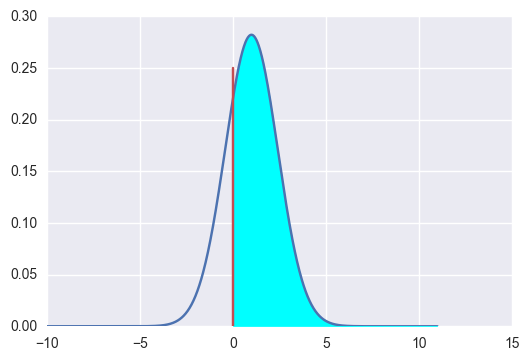

ywins =  0.758924433521


In [192]:
def calc_ywins():
    from scipy.stats import norm
    meanD = 1 - 0
    varD = 1 + 1
    x = np.linspace(-10, 11, 1000)
    dProbs = norm.pdf(x, meanD, scale=varD**(1/2)) # scale is standard deviation
    plt.plot(x, dProbs)
    plt.plot([0,0],[0,0.25], 'r-')
    plt.fill_between(x,0,dProbs,color='cyan', where=x>0)
    plt.show()

    yWins = [d for (i,d) in enumerate(dProbs) if x[i] > 0]
    print("ywins = ", np.trapz(yWins, dx=x[1]-x[0]))
calc_ywins()